
=== Data Statistics ===

Acceleration (g):
                AX           AY           AZ
count  3140.000000  3140.000000  3140.000000
mean      0.302685    -0.053853     0.069995
std       0.857327     0.927175     1.000067
min      -1.824333    -3.443668    -3.450607
25%      -0.191322    -0.627920    -0.342293
50%       0.070150    -0.001266     0.021752
75%       0.630602     0.410836     0.578398
max       3.574442     2.582366     2.600052

Rotation (rad/s):
                RX           RY           RZ
count  3140.000000  3140.000000  3140.000000
mean     -0.249689     0.083261     0.147318
std       2.248213     3.100132     1.927657
min     -13.667364    -7.391607   -13.376505
25%      -1.609062    -2.132352    -0.901509
50%      -0.338391     0.107992     0.025691
75%       0.772936     2.048082     1.244767
max      10.279902    12.554278     6.099839

Max Acceleration Magnitude: 4.220 g
Max Rotation Magnitude: 14.588 rad/s


/var/folders/zr/55ct9rx16hb8nk7z_w9q07900000gn/T/ipykernel_12628/3634653595.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


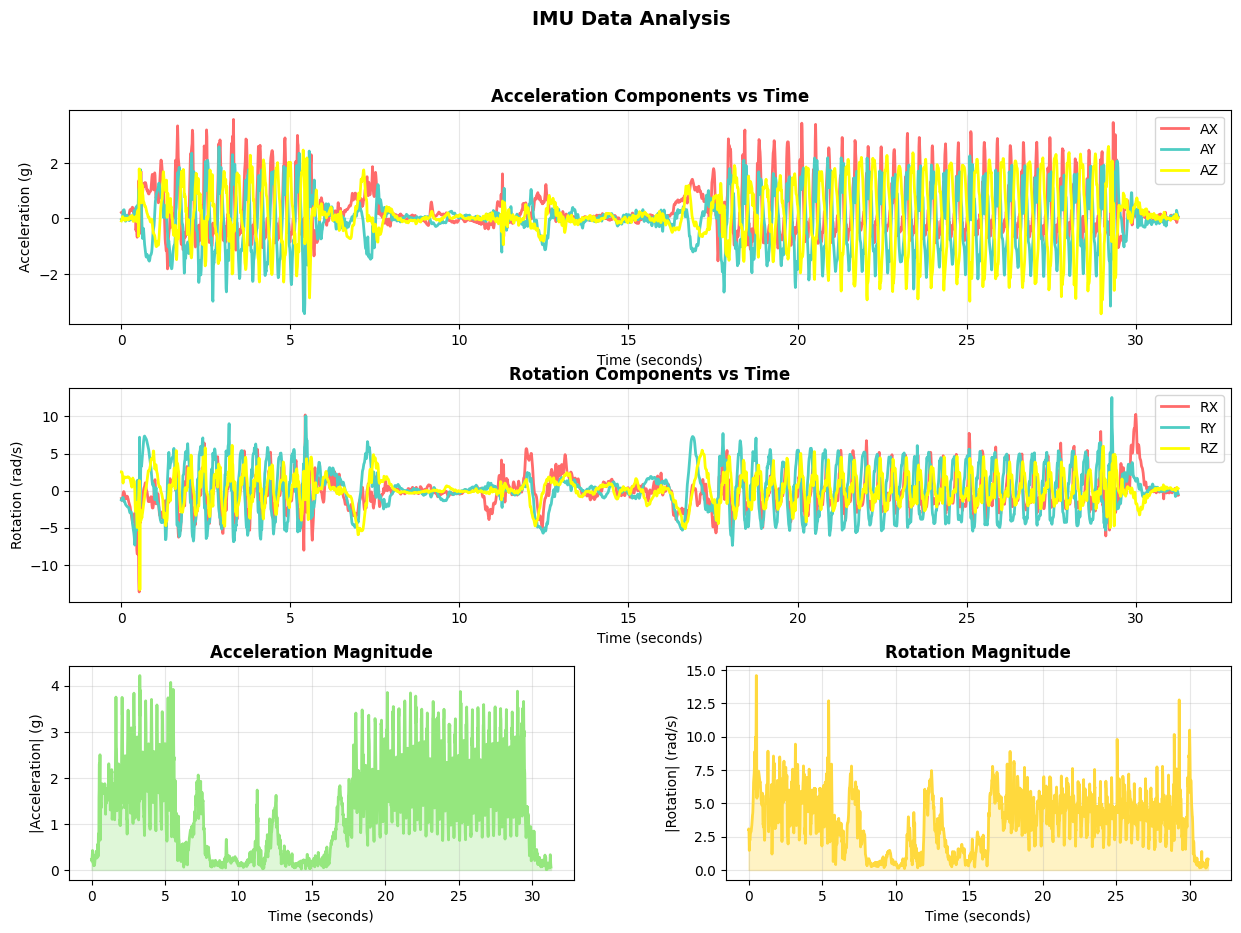

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Load the data
# Replace 'your_data.csv' with your actual file path
data = pd.read_csv('./Data/motion.csv')

# Convert timestamp to relative time (seconds from start)
data['Time'] = data['Timestamp'] - data['Timestamp'].iloc[0]

# Create a figure with subplots
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

# Define colors for each axis
colors = {'X': '#FF6B6B', 'Y': '#4ECDC4', 'Z': 'yellow'}

# Plot 1: Acceleration components over time
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(data['Time'], data['AX'], label='AX', color=colors['X'], linewidth=2)
ax1.plot(data['Time'], data['AY'], label='AY', color=colors['Y'], linewidth=2)
ax1.plot(data['Time'], data['AZ'], label='AZ', color=colors['Z'], linewidth=2)
ax1.set_xlabel('Time (seconds)', fontsize=10)
ax1.set_ylabel('Acceleration (g)', fontsize=10)
ax1.set_title('Acceleration Components vs Time', fontsize=12, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Plot 2: Rotation components over time
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(data['Time'], data['RX'], label='RX', color=colors['X'], linewidth=2)
ax2.plot(data['Time'], data['RY'], label='RY', color=colors['Y'], linewidth=2)
ax2.plot(data['Time'], data['RZ'], label='RZ', color=colors['Z'], linewidth=2)
ax2.set_xlabel('Time (seconds)', fontsize=10)
ax2.set_ylabel('Rotation (rad/s)', fontsize=10)
ax2.set_title('Rotation Components vs Time', fontsize=12, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# Plot 3: Acceleration magnitude
ax3 = fig.add_subplot(gs[2, 0])
acc_magnitude = np.sqrt(data['AX']**2 + data['AY']**2 + data['AZ']**2)
ax3.plot(data['Time'], acc_magnitude, color='#95E77E', linewidth=2)
ax3.set_xlabel('Time (seconds)', fontsize=10)
ax3.set_ylabel('|Acceleration| (g)', fontsize=10)
ax3.set_title('Acceleration Magnitude', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.fill_between(data['Time'], 0, acc_magnitude, alpha=0.3, color='#95E77E')

# Plot 4: Rotation magnitude
ax4 = fig.add_subplot(gs[2, 1])
rot_magnitude = np.sqrt(data['RX']**2 + data['RY']**2 + data['RZ']**2)
ax4.plot(data['Time'], rot_magnitude, color='#FFD93D', linewidth=2)
ax4.set_xlabel('Time (seconds)', fontsize=10)
ax4.set_ylabel('|Rotation| (rad/s)', fontsize=10)
ax4.set_title('Rotation Magnitude', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.fill_between(data['Time'], 0, rot_magnitude, alpha=0.3, color='#FFD93D')

# Add overall title
fig.suptitle('IMU Data Analysis', fontsize=14, fontweight='bold', y=0.98)

# Display statistics
print("\n=== Data Statistics ===")
print("\nAcceleration (g):")
print(data[['AX', 'AY', 'AZ']].describe())
print("\nRotation (rad/s):")
print(data[['RX', 'RY', 'RZ']].describe())
print(f"\nMax Acceleration Magnitude: {acc_magnitude.max():.3f} g")
print(f"Max Rotation Magnitude: {rot_magnitude.max():.3f} rad/s")

plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig('imu_data_plot.png', dpi=300, bbox_inches='tight')